# Perceptron e redes neurais profundas


> As [redes neurais profundas](http://neuralnetworksanddeeplearning.com/index.html) consistem em **múltiplas camadas** de neurônios artificiais, onde cada camada transforma os dados de entrada de forma **não-linear** para **extrair características** cada vez mais abstratas. Essas camadas intermediárias, chamadas de camadas ocultas, permitem que a rede aprenda **representações complexas dos dados**, o que as torna extremamente eficazes em tarefas como reconhecimento de imagem, processamento de linguagem natural e outras aplicações de inteligência artificial.


Um "neurônio artificial" realiza a seguinte computação:

$$a = g(z) = g(b + \sum_{i=1}^m w_ix_i)$$

$$a = g(b + \mathbf{W}^T\mathbf{x})$$

$$\mathrm{onde}\quad \mathbf{x} = \begin{bmatrix} x_1 \\ \vdots \\ x_m \end{bmatrix}, \; \mathbf{W} = \begin{bmatrix} w_1 \\ \vdots \\ w_m \end{bmatrix}$$

Esquema de um neurônio artificial:

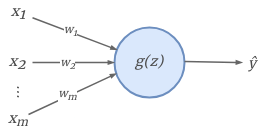

# Função de ativação não-linear g($\cdot$)
Exemplos de funções de ativação:

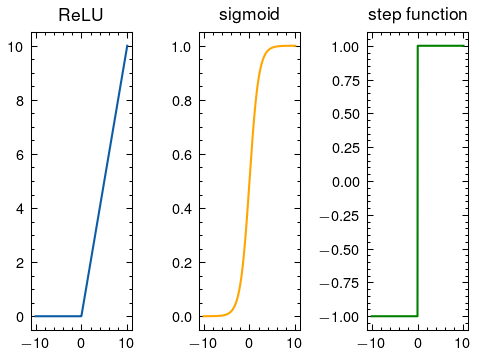

# Redes neurais profundas

Exemplo de uma rede neural profunda:

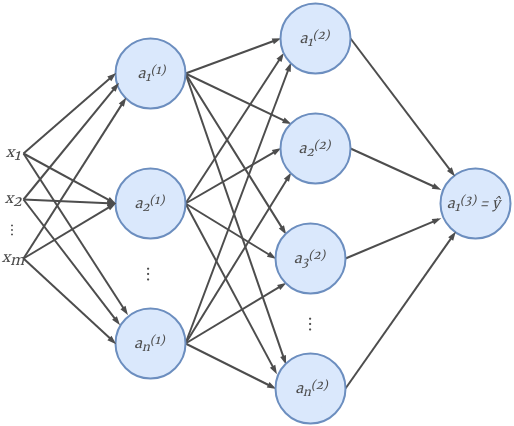

Computação realizada pelo primeiro neurônio:
$$a_1^{(1)} = g(b + \mathbf{W}^T\mathbf{x})$$

Computação realizada pela primeira camada:
$$\mathbf{a}^{(1)} = g(\mathbf{b} + \mathbf{W}^T \mathbf{x})$$

$$\mathrm{onde} \quad \mathbf{W} = \begin{bmatrix} w_{11} & w_{12} & \cdots & w_{1n} \\ \vdots & \vdots & \ddots & \vdots \\ w_{m1} & w_{m2} & \cdots & w_{mn} \end{bmatrix}, \;
\mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{bmatrix}$$

# Otimizando os pesos da rede

Definimos uma função de erro:

$$\mathcal{L}(f(x^{(i)}; \theta), y^{(i)})$$

Por exemplo, a função do erro quadrático médio:

$$\mathrm{MSE} = \frac{1}{N}\sum_{i=1}^N(y_i - \hat{y}_i)^2$$

A função de erro empírica é dada por:

$$J(\theta) = \frac{1}{k} \sum_{i=1}^k \mathcal{L}(f(x^{(i)}; \theta), y^{(i)})$$

Assim, o treinamento corresponde a encontrar $\theta^{\star}$:

$$\theta^* = \mathop{\arg \min}\limits_{\theta} J(\theta)$$

# Otimização e _backpropagation_

Diversos algoritmos de otimização podem ser usados, e.g. [SGD](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).

A ideia é atualizar os valores dos pesos usando o [gradiente](https://pt.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/the-gradient) da função custo:

$$\theta_{t+1} := \theta_{t} - \gamma \nabla J(\theta)$$


Como calcular o gradiente $\nabla J(\theta)$? Usando o algoritmo de [**_backpropagation!_**](https://www.youtube.com/watch?v=Ilg3gGewQ5U)



Ilustração da minimização na hipersuperfície $J(\theta)$:

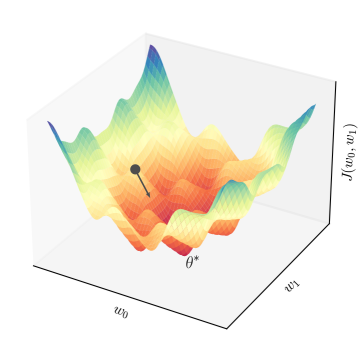

# Implementação do _perceptron_



In [ ]:
!pip install numpy matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_dataset(N: int, p1: list, p2: list, seed: int = 1984):
    """Gera um dataset de tamanho N a partir dos pontos p1 e p2."""
    p1_ = np.tile(p1, reps=int(N // 2)).reshape(N // 2, 2)
    p2_ = np.tile(p2, reps=int(N // 2)).reshape(N // 2, 2)

    rng = np.random.default_rng(seed)  # random number generator

    X = np.concatenate((p1_, p2_)) + rng.standard_normal((N, 2))  # examples
    Y = np.concatenate((np.tile(+1, p1_.shape[0]), np.tile(-1, p2_.shape[0])))  # labels

    return (X, Y)

In [ ]:
X, Y = generate_dataset(N=100, p1=[-1, 1], p2=[1, -3])

In [ ]:
# prompt: plot X, Y

plt.scatter(X[Y == +1, 0], X[Y == +1, 1], label='+1')
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], label='-1')
plt.legend()
plt.show()


In [ ]:
def split_dataset(dataset, train_split_percentage: float, seed: int = 1984):
    """Embaralha e divide o dataset"""
    X, Y = dataset

    rng = np.random.default_rng(seed)  # random number generator
    idx = rng.permutation(X.shape[0])
    x, y = X[idx], Y[idx]

    n_train = int(X.shape[0] * train_split_percentage)
    x_train, y_train = x[:n_train], y[:n_train]
    x_test, y_test = x[n_train:], y[n_train:]

    return (x_train, y_train), (x_test, y_test)

In [ ]:
(x_train, y_train), (x_test, y_test) = split_dataset((X, Y), train_split_percentage=0.7)

In [ ]:
def loss(y, ypred):
    """Função de perda."""
    return np.abs(y - ypred) # erro abs

In [ ]:
def activation(z: np.ndarray):
    """Função de ativação."""
    return np.where(z > 0, 1, -1)  # step fn

In [ ]:
def perceptron(x: np.ndarray, w: np.ndarray, b: float):
    """Função do perceptron."""
    z = np.dot(x, w) + b
    ypred = activation(z)
    return ypred

In [ ]:
def update_weights(x: np.ndarray, y: np.ndarray, ypred: np.ndarray, w: np.ndarray, b: float, lr: float):
    """Atualiza os pesos e o bias."""
    ypred = perceptron(x, w, b)
    delta = lr * loss(y, ypred)
    w = w + (delta * x)
    b = b + delta
    return w, b

In [ ]:
# define os hiperparametros do modelo
lr = 1
w = np.array([0, 0])
b = 0

In [ ]:
# treina o perceptron
epoch, max_epoch = 1, 100

while epoch <= max_epoch:
    for x, y in zip(x_train, y_train):
        ypred = perceptron(x, w, b)
        w, b = update_weights(x, y, ypred, w, b, lr)

    print(f"Epoch {epoch}... ", end='\r')
    epoch += 1

In [ ]:
# acurácia no treinamento
ypred_train = perceptron(x_train, w, b)
acc_train = np.mean(ypred_train == y_train)
print(f"Acurácia no treinamento: {acc_train}")

In [ ]:
# acurácia no teste
ypred_test = perceptron(x_test, w, b)
acc_test = np.mean(ypred_test == y_test)
print(f"Acurácia no teste: {acc_test}")

In [ ]:
# prompt: plot the decision boundary of the perceptron in the test set

# Plot the decision boundary
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = perceptron(np.c_[xx.ravel(), yy.ravel()], w, b)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=20, edgecolor='k')
plt.title("Decision Boundary on Test Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
